# Chapter 4. Under the Hood: Training a Digit Classifier

- Arrays and Tensors
- Broadcasting
- SGD (Stochastic Gradient Descent)
- Loss Function
- Mini-Batches
- Neural Network Math

# Getting to know the MNIST digits data set

In [11]:
from fastai.vision.all import *
path = untar_data(URLs.MNIST)

In [13]:
(path/'training/0').ls()

(#5923) [Path('/home/john/.fastai/data/mnist_png/training/0/28771.png'),Path('/home/john/.fastai/data/mnist_png/training/0/6883.png'),Path('/home/john/.fastai/data/mnist_png/training/0/36090.png'),Path('/home/john/.fastai/data/mnist_png/training/0/27567.png'),Path('/home/john/.fastai/data/mnist_png/training/0/57629.png'),Path('/home/john/.fastai/data/mnist_png/training/0/48542.png'),Path('/home/john/.fastai/data/mnist_png/training/0/42180.png'),Path('/home/john/.fastai/data/mnist_png/training/0/27200.png'),Path('/home/john/.fastai/data/mnist_png/training/0/33492.png'),Path('/home/john/.fastai/data/mnist_png/training/0/10750.png')...]

In [16]:
Image.open(path/'training/0/6883.png')

In [17]:
image = Image.open(path/'training/0/6883.png')

In [18]:
image

In [20]:
image_tensor = tensor(image)

In [21]:
path = untar_data(URLs.MNIST_SAMPLE)

In [22]:
path.ls()

(#3) [Path('/home/john/.fastai/data/mnist_sample/valid'),Path('/home/john/.fastai/data/mnist_sample/labels.csv'),Path('/home/john/.fastai/data/mnist_sample/train')]

In [23]:
(path/'train').ls()

(#2) [Path('/home/john/.fastai/data/mnist_sample/train/7'),Path('/home/john/.fastai/data/mnist_sample/train/3')]

In [24]:
(path/'train').ls()

(#2) [Path('/home/john/.fastai/data/mnist_sample/train/7'),Path('/home/john/.fastai/data/mnist_sample/train/3')]

In [30]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()
threes

(#6131) [Path('/home/john/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/john/.fastai/data/mnist_sample/train/3/10091.png')...]

In [43]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [44]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [160]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
len(colors)

170

In [80]:
df = pd.DataFrame(tensor(im3)[4:26, 4:22])
df.style.set_properties(**{'font-size':'10pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


# A first attempt
For a first attempt at recognizing digits, we won't use a neural network. We'll see how similar each pixel of a sample is to an "ideal 3" or an "ideal 7". We'll consider it a three if the sample is closer to this ideal 3.

In [81]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

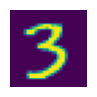

In [87]:
show_image(three_tensors[1])

In [88]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [100]:
print("A tensor's rank is its dimension:", stacked_threes.ndim, )
print("A tensor's rank is its dimension:", len(stacked_threes.shape) )

A tensor's rank is its dimension: 3
A tensor's rank is its dimension: 3


<Axes: >

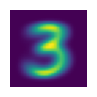

In [101]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

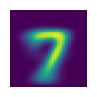

In [102]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

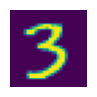

In [103]:
a_3 = stacked_threes[1]
show_image(a_3)

In [121]:
def l1(a,b):
    return (a-b).abs().mean()

def l2(a,b):
    return ((a-b)**2).mean().sqrt()

print("a_3 vs mean3:", l1(a_3, mean3), l2(a_3, mean3))
print("a_3 vs mean7:", l1(a_3, mean7), l2(a_3, mean7))

a_3 vs mean3: tensor(0.1114) tensor(0.2021)
a_3 vs mean7: tensor(0.1586) tensor(0.3021)


We don't have to define these norms. They're included in PyTorch under `torch.nn.functional`. `fastai` imports this module as `F`:

In [124]:
print("a_3 vs mean3:", F.l1_loss(a_3.float(), mean3),  F.mse_loss(a_3, mean3).sqrt())
print("a_3 vs mean7:", F.l1_loss(a_3.float(), mean7),  F.mse_loss(a_3, mean7).sqrt())

a_3 vs mean3: tensor(0.1114) tensor(0.2021)
a_3 vs mean7: tensor(0.1586) tensor(0.3021)


We use PyTorch tensors instead of NumPy arrays because NumPy doesn't support GPU operations (but PyTorch does).

In [129]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls() if '.ipynb_checkpoints' not in o.name]).float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls() if '.ipynb_checkpoints' not in o.name]).float()/255

In [131]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [153]:
def mnist_distance(a,b):
    return (a-b).abs().mean((-2,-1))

In [149]:
print(mnist_distance(valid_3_tens, mean3), mnist_distance(valid_3_tens, mean3).shape)

tensor([0.1068, 0.1330, 0.1115,  ..., 0.1143, 0.1238, 0.1095]) torch.Size([1010])


In [154]:
def is_3(t):
    return mnist_distance(t, mean3) < mnist_distance(t, mean7)

In [155]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [156]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [158]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## First attempt summary
We get >90% accuracy using this method, but want to do better. The digits 3 and 7 look pretty different: Surely we can do better. 

We don't have a way to improve this model, so we need to find another approach.

# Attempt 2: SGD (Stochastic Gradient Descent)

Instead of calculating "ideal" 3 and 7s and the distance between those and any particular 3 or 7, let's assign a weight to each pixel such that this function returns the probability that a given image is a three:

```py
def pr_three(x, w): return (x*w).sum()
```

That is, the dot product of our image with the weights gives some number, and we want the number to be higher the more our image looks like a three.

We might choose the weights randomly at first, which would make our function not very good. Then if we had some way to tweak the weights a little bit and know whether the function's performance was improving, we could keep tweaking the weights until we found ones that were good enough for our purposes.

It will not be possible to get arbitrarily good results with only this single function, so later we will need to tweak the process to include additional linear and ReLU layers. But for now, we will try to get the best results we can with this approach.

Here is an intuitive explanation for why we should expect this approach to have good results. There are pixels that tend to be dark for a 7 but not for a 3, and vice versa. So when we see dark pixels in those areas, it represents a strong signal for one character or the other. In other words, we should pay more attention the values of the pixels in those areas than to those pixels that might be found in either one. If we had to limit our sample to only a small subset of the pixels of the image, we would want to be looking at one such region.

Here are the steps that we will take:
- Initialize the weights
- Until "done":
  - Predict whether the given image appears to be a 3 or a 7
  - Calculate the model's _loss_
  - Calculate the _gradient_ of the weights
  - _Step_ the weights

Instead of doing it for our image classification problem, we start with a simpler function (a quadratic).

In [165]:
# If this were a real example, we wouldn't know f. 
# Instead, we would have a bunch of sample data and try to derive f.
def f(x):
    return x**2

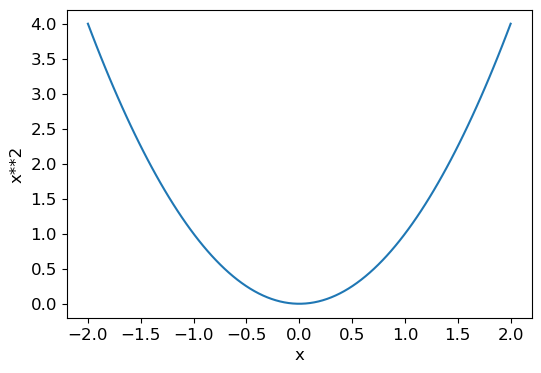

In [168]:
from fastbook import plot_function
plot_function(f,'x','x**2')

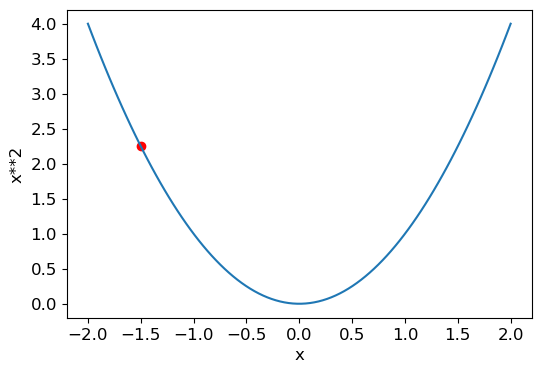

In [173]:
# Plot the function and a particular value
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color="red");

In [174]:
xt = tensor(3.).requires_grad_()

In [175]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [176]:
yt.backward()

In [178]:
xt.grad

tensor(6.)

In [189]:
xt = tensor([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]).requires_grad_()
xt

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], requires_grad=True)

In [194]:
def g(x): 
    return (x**2).sum()

In [195]:
yt = g(xt)
yt

tensor(385., grad_fn=<SumBackward0>)

In [196]:
yt.backward()
xt.grad

tensor([ 4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.])

Let's generate some noisy data that represents the speed of a rollar coaster at regular time intervals.

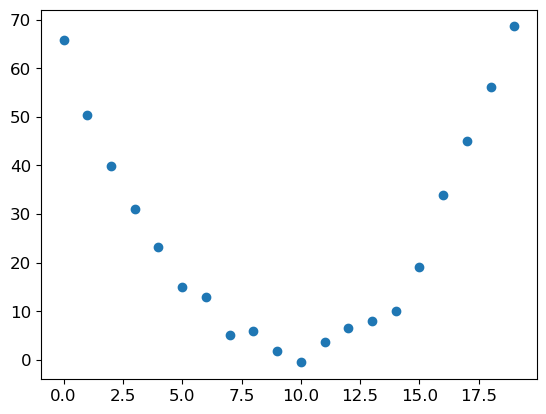

In [202]:
time = torch.arange(0,20).float();
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

Let's guess that the underlying is quadratic. In reality, we won't be working with quadratic functions. But for this problem, it will simplify the process of detemining the underlying function (which we secretly know to be quadratic), because a quadratic function is specified by just three parameters a,b, and c: `a*(time**2) + (b*time) + c`

In [271]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [272]:
def mse(preds, targets):
    return ((preds - targets)**2).mean().sqrt()

In [294]:
# 0. Create data set (time, speed)
time = torch.arange(0,20).float(); 
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

params = torch.randn(3).requires_grad_() # 1. initialize the weights
preds = f(time, params) # 2. predict values (with random weights)

In [295]:
# Aside, let's show whether our predictions are any good:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

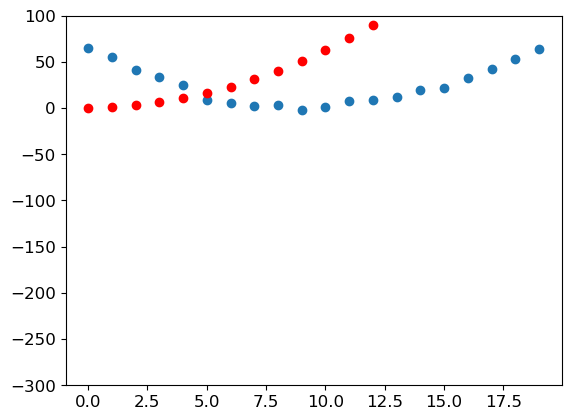

In [296]:
show_preds(preds)

In [288]:
# 3. Calculate loss
loss = mse(preds, speed)

In [289]:
# 4. Calculate gradients
loss.backward()

In [290]:
# 5. Step the weights
lr = 1e-4
params.data -= lr * params.grad.data
params.grad = None

In [291]:
# Repeat:
def step(params, prn=True):
    preds = f(time, params) # 2. Predict
    loss = mse(preds, speed) # 3. Loss
    loss.backward() # 4. Gradient
    params.data -= lr * params.grad.data # 5. Step weights
    params.grad = None
    if prn: print(loss.item())
    return preds

In [292]:
#preds = step(params)
#for i in range(1000):
#    preds = step(params, prn=False)
#    
#show_preds(preds)

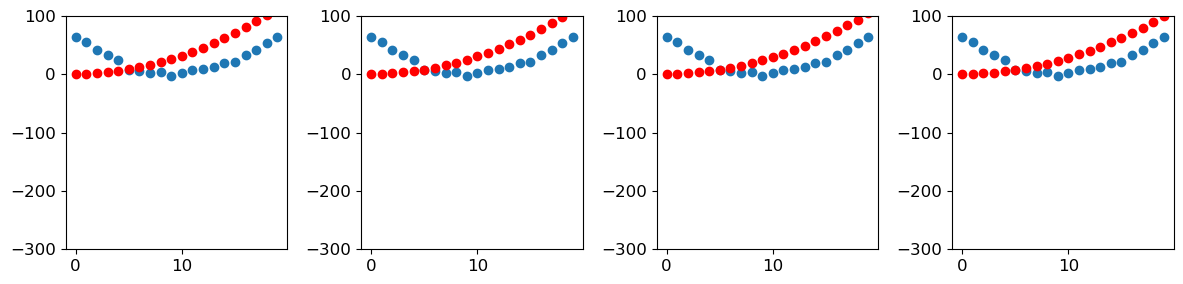

In [302]:
_, axs = plt.subplots(1,4, figsize=(12,3))
for ax in axs: show_preds(step(params, False), ax)
plt.tight_layout()

In [304]:
stacked_threes.size()

torch.Size([6131, 28, 28])

In [305]:
stacked_threes.view(-1, 28*28).size()

torch.Size([6131, 784])

In [307]:
stacked_threes.view(-1, 28*14).size()

torch.Size([12262, 392])

Aside: What does unsqueeze do?

In [346]:
tns = tensor([1., 2, 3])
print("First, the original tensor:")
print(tns)
print(tns.size())
print("The 0 element is", tns[0].item())
print("The 1 element is", tns[1].item())
print("The 2 element is", tns[2].item())
print()
print("Next, unsqueeze(0)")
print(tns.unsqueeze(0))
print(tns.unsqueeze(0).size())
print("The 0, 0 element is", tns.unsqueeze(0)[0][0].item())
print("The 0, 1 element is", tns.unsqueeze(0)[0][1].item())
print("The 0, 2 element is", tns.unsqueeze(0)[0][2].item())
print()
print("Finally, unsqueeze(1)")
print(tns.unsqueeze(1))
print(tns.unsqueeze(1).size())
print("The 0, 0 element is", tns.unsqueeze(1)[0][0].item())
print("The 1, 0 element is", tns.unsqueeze(1)[1][0].item())
print("The 2, 0 element is", tns.unsqueeze(1)[2][0].item())

First, the original tensor:
tensor([1., 2., 3.])
torch.Size([3])
The 0 element is 1.0
The 1 element is 2.0
The 2 element is 3.0

Next, unsqueeze(0)
tensor([[1., 2., 3.]])
torch.Size([1, 3])
The 0, 0 element is 1.0
The 0, 1 element is 2.0
The 0, 2 element is 3.0

Finally, unsqueeze(1)
tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
The 0, 0 element is 1.0
The 1, 0 element is 2.0
The 2, 0 element is 3.0


In [347]:
28*28

784

# Now, let's get back to the MNIST data set.

Ok, so my expectation is that I'll do something like this:

My data starts as N x 28 x 28 x 1: N images, 28x28, with a label.

In the rollar coast example, my data was N x 1 x 1: N measurements of speed at time t.

So perhaps I can simplify my MNIST dataset slightly to N x 784 x 1: N images, 784 pixels each, 1 label.

The weights I used in the rollar coaster example were 3 x 1 : A tuple of a,b,c and `time` that fed into a quadratic equation `a*(time**2) + b*time + c`. Interestingly, the weights do not match the shape of my data. Instead, the output of my model (the prediction) matched the shape of my data (or some part of the shape). My weights matched the shape of my model, and my model output was a number (for each input).

For the MNIST problem, my weights will be 784 for each layer of my neural net. My model will output a single number: The label associated with the correct classification.

Perhaps there will be one additional parameter somewhere along the way, because I want both weights and biases.

In [396]:
# Step 0: Gather the data
path = untar_data(URLs.MNIST_SAMPLE)
train_path = path/"train"
valid_path = path/"valid"
images = list(itertools.chain.from_iterable( [
    [tensor(Image.open(file)) for file in digit_path.ls().sorted()]
    for digit_path in train_path.ls().sorted()
]))

In [416]:
# Use view to convert stack [12396, 28, 28] to [12396, 784]
train_x = torch.stack(images).view(-1, 28*28)
print(train_x.size())

torch.Size([12396, 784])


<Axes: >

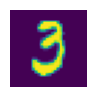

In [407]:
show_image(images[6130]) # The last 3

<Axes: >

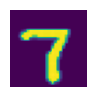

In [408]:
show_image(images[6131]) # The first 7

To remind myself of the big picture, here are the steps I'm going to take:

0. Create the training and validation datasets
1. Initialize the weights
1. Predict whether the given image appears to be a 3 or a 7
1. Calculate the model's loss
1. Calculate the gradient of the weights
1. Step the weights
1. Repeat from step 2 until done


In [621]:
# Step 0: Create training and validation datasets
path = untar_data(URLs.MNIST_SAMPLE)
train_path = path/"train"
valid_path = path/"valid"

def load_and_label(p):
    dirs = p.ls().sorted()
    images_by_category = [ [tensor(Image.open(file)) for file in dir.ls().sorted() if file.is_file()] for dir in dirs] 
    labels = torch.cat( [ torch.full( (len(images_by_category[i]),), i) for i in range(len(images_by_category))])  
    labels = labels.unsqueeze(1).float()
    images = torch.cat([torch.stack(l) for l in images_by_category])
    images = images.view(-1, 28*28).float()
    return (images, labels)

def to_dataset(images, labels):
    return list(zip(images, labels))

(train_xs, train_ys) = load_and_label(train_path) 
(valid_xs, valid_ys) = load_and_label(valid_path) 

train_dset = to_dataset(train_xs, train_ys)
valid_dset = to_dataset(valid_xs, valid_ys)

train_dl = DataLoader(train_dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=256)


In [622]:
# Step 1: Initialize weights
def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28,1))
bias = init_params(1)

# Step 2: Predict
preds = train_xs@weights + bias

# Aside: measure accuracy:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()
    
# corrects = (preds>0.0).float() == train_ys
# accuracy = corrects.float().mean().item()

# Step 3: Calculate loss
def mnist_loss(predictions, targets):
    preds = predictions.sigmoid()
    return torch.where(targets==0, preds, 1-preds).mean()

loss = mnist_loss(preds, train_ys)

# Step 4: Calculate gradient
loss.backward()

# Step 5: Adjust weights
lr = 1
weights.data -= weights.grad * lr
bias.data -= bias.grad * lr

# Zero out the gradients after we've made use of them
weights.grad.zero_()
bias.grad.zero_()

print(batch_accuracy(preds, train_ys))

def calc_grad(xs, ys, model):
    # preds = model(xs)
    preds = xs@weights + bias
    loss = mnist_loss(preds, ys)
    loss.backward()
    
def train_epoch(model, lr, params):
    calc_grad(train_xs, train_ys, model)
    for p in params:
        p.data -= p.grad * lr
        # print(p.grad)
        p.grad.zero_()

print(f"start accuracy {batch_accuracy(train_xs@weights + bias, train_ys)}")
epoch = 0
while epoch < 1000 and batch_accuracy(train_xs@weights + bias, train_ys) < .98: 
    epoch += 1
    train_epoch(None, 1, (weights, bias))
    if (epoch % 25 == 0):
        print(f"epoch {epoch}: accuracy {batch_accuracy(train_xs@weights + bias, train_ys)}")
    

tensor(0.3512)
start accuracy 0.3631010055541992
epoch 25: accuracy 0.7995321154594421
epoch 50: accuracy 0.8892384767532349
epoch 75: accuracy 0.921668291091919
epoch 100: accuracy 0.9336882829666138
epoch 125: accuracy 0.9405453205108643
epoch 150: accuracy 0.9472410678863525
epoch 175: accuracy 0.9487738013267517
epoch 200: accuracy 0.9536140561103821
epoch 225: accuracy 0.954420804977417
epoch 250: accuracy 0.954985499382019
epoch 275: accuracy 0.9563568830490112
epoch 300: accuracy 0.9563568830490112
epoch 325: accuracy 0.9563568830490112
epoch 350: accuracy 0.9563568830490112
epoch 375: accuracy 0.9563568830490112
epoch 400: accuracy 0.9563568830490112
epoch 425: accuracy 0.9563568830490112
epoch 450: accuracy 0.9563568830490112
epoch 475: accuracy 0.9563568830490112
epoch 500: accuracy 0.9563568830490112
epoch 525: accuracy 0.9563568830490112
epoch 550: accuracy 0.9563568830490112
epoch 575: accuracy 0.9563568830490112
epoch 600: accuracy 0.9563568830490112
epoch 625: accuracy 0

# Putting it all together, again
Ok, the previous section got pretty confusing because the book shows how to do it "step by step" and also "all at once", and then back again and again. Let's try to write the whole problem again.

Here is the overview of how I'll do it:

## Setup:
Create datasets (and data loaders)
Define functions: model, loss function, accuracy, etc.
Create learning loop

## Run:
Initialize weights
Run learning loop
Show increasing accuracy


In [2]:
def load_and_label(p):
    dirs = p.ls().sorted()
    images_by_category = [ [tensor(Image.open(file)) for file in dir.ls().sorted() if file.is_file()] for dir in dirs] 
    labels = torch.cat( [ torch.full( (len(images_by_category[i]),), i) for i in range(len(images_by_category))])  
    labels = labels.unsqueeze(1).float()
    images = torch.cat([torch.stack(l) for l in images_by_category])
    images = images.view(-1, 28*28).float()
    return (images, labels)
    
def to_dataset(images, labels):
    return list(zip(images, labels))

def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()

def init():
    # Create the datasets
    path = untar_data(URLs.MNIST_SAMPLE)
    train_path = path/"train"
    valid_path = path/"valid"
    
    (train_xs, train_ys) = load_and_label(train_path) 
    (valid_xs, valid_ys) = load_and_label(valid_path) 
    
    train_dset = to_dataset(train_xs, train_ys)
    valid_dset = to_dataset(valid_xs, valid_ys)
    
    train_dl = DataLoader(train_dset, batch_size=256)
    valid_dl = DataLoader(valid_dset, batch_size=256) 
    
    weights = init_params((28*28,1))
    bias = init_params(1)
    
    return (train_xs, train_ys, valid_xs, valid_ys, train_dl, valid_dl, weights, bias)


In [625]:
(train_xs, 
 train_ys, 
 valid_xs, 
 valid_ys, 
 train_dl, 
 valid_dl, 
 weights, 
 bias) = init()

In [633]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==0, predictions, 1-predictions).mean()

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

def linear1(xb):
    return xb@weights + bias

def train_epoch(model, lr, params):
    for xb, yb in train_dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [627]:
lr = 1
weights = init_params((28*28,1))
bias = init_params(1)
params = weights, bias
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.5072 0.7708 0.9099 0.9343 0.9404 0.9467 0.9536 0.9579 0.9575 0.954 0.9608 0.9608 0.9618 0.9599 0.9589 0.9628 0.9623 0.9657 0.9657 0.9657 

In [628]:
dls = DataLoaders(train_dl, valid_dl)
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(10, lr=1e-3)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.052037,0.281323,0.720314,00:00
1,0.035957,0.111914,0.888616,00:00
2,0.028600,0.073508,0.925417,00:00
3,0.024817,0.050893,0.947988,00:00
4,0.021153,0.040020,0.960255,00:00
5,0.019549,0.037059,0.963199,00:00
6,0.018384,0.030435,0.969578,00:00
7,0.016859,0.029005,0.971541,00:00
8,0.016381,0.028106,0.972031,00:00
9,0.015818,0.028220,0.971541,00:00


In [600]:
# def simple_net(xb):
#     res = xb@w1 + b1
#     res = res.max(tensor(0.0))
#     res = res@w2 + b2
#     return res
# 
# w1 = init_params((28*28, 30))
# b1 = init_params(30)
# w2 = init_params((30,1))
# b2 = init_params(1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.524598,0.308303,0.691855,00:00
1,0.296488,0.210867,0.793425,00:00
2,0.189280,0.131590,0.872424,00:00
3,0.132846,0.097985,0.905299,00:00
4,0.103198,0.083077,0.919038,00:00
5,0.086833,0.074257,0.929343,00:00
6,0.076830,0.068409,0.934249,00:00
7,0.070022,0.064388,0.938665,00:00
8,0.065094,0.061311,0.940137,00:00
9,0.061394,0.058640,0.942591,00:00


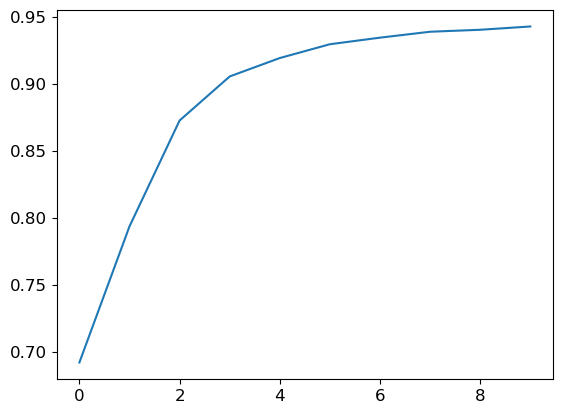

In [650]:
simple_net2 = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30,1)
)
dls = DataLoaders(train_dl, valid_dl)
learn = Learner(dls, simple_net2, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(10, 1e-4)
plt.plot(L(learn.recorder.values).itemgot(2))

In [643]:
my_model = nn.Sequential(
    nn.Linear(28*28, 50),
    nn.ReLU(),
    nn.Linear(50,50),
    nn.ReLU(),
    nn.Linear(50,50),
    nn.ReLU(),
    nn.Linear(50,1)
)
dls = DataLoaders(train_dl, valid_dl)
learn = Learner(dls, my_model, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.173738,0.339991,0.651129,00:00
1,0.102113,0.150500,0.872424,00:00
2,0.068630,0.086914,0.930324,00:00
3,0.051429,0.063872,0.950442,00:00
4,0.041691,0.051838,0.962709,00:00
5,0.035725,0.044578,0.966634,00:00
6,0.031770,0.039905,0.968597,00:00
7,0.028931,0.036661,0.970069,00:00
8,0.026785,0.034207,0.971541,00:00
9,0.025104,0.032247,0.974485,00:00


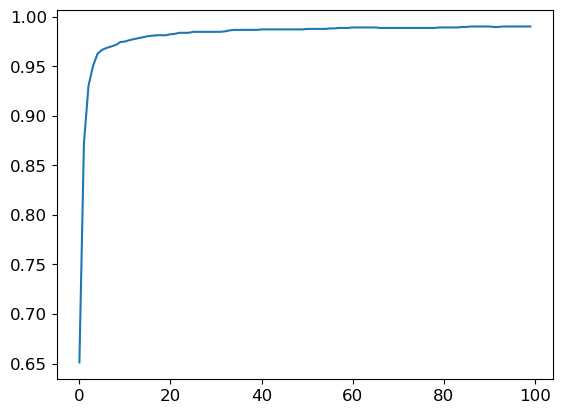

In [644]:
learn.fit(100, 1e-3)
plt.plot(L(learn.recorder.values).itemgot(2))

In [653]:
my_model = nn.Sequential(
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.ReLU(),
    nn.Linear(256,1)
)
dls = DataLoaders(train_dl, valid_dl)
learn = Learner(dls, my_model, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(100, 1e-1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.190411,0.494806,0.504416,00:00
1,0.125030,0.262050,0.743867,00:00
2,0.056412,0.120011,0.886163,00:00
3,0.031277,0.070873,0.930324,00:00
4,0.020714,0.048440,0.952895,00:00
5,0.015442,0.040612,0.959764,00:00
6,0.012507,0.035728,0.963690,00:00
7,0.010013,0.029662,0.970559,00:00
8,0.007575,0.029491,0.971541,00:00
9,0.006497,0.027049,0.973994,00:00
